# FinFraudGuard

## Data Cleaning, EDA and base model

Imports

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Constants

In [124]:
RANDOM_STATE = 42
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### 1. Data Loading and Exploration

In [125]:
data = pd.read_csv('../data/creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [127]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [128]:
print(f"Target classes distribution in % {data['Class'].value_counts(normalize=True) * 100}")

Target classes distribution in % Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


All columns are numerical. The dataset contains 284807 rows and 31 columns. The target variable is 'Class', which indicates whether a transaction is fraudulent (1) or not (0). The dataset is highly imbalanced, with only 0.167% of the transactions being fraudulent.

### 2. Data Cleaning and Preprocessing

In [129]:
print(f"Number of missing values: {data.isnull().sum()}")

Number of missing values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There are no missing values in the dataset.

In [130]:
print(f"Number of duplicates: {data.duplicated().sum()}")

Number of duplicates: 1081


In [131]:
data = data.drop_duplicates()

There was 1081 duplicate rows in the dataset. We have removed them.

Feature Engineering

In [132]:
# Time column represents the number of seconds elapsed since the first transaction
# We convert it to hours
data["Hour"] = (data["Time"] / 3600) % 24
data["is_night"] = ((data["Hour"] < 6) | (data["Hour"] > 22)).astype(int)

# Drop the Time column
data = data.drop(columns=["Time"])

In [133]:
data["log_Amount"] = np.log1p(data["Amount"])
data["is_high_amount"] = (data["Amount"] > 1000).astype(int)

### 3. Exploratory Data Analysis (EDA)

Class Distribution

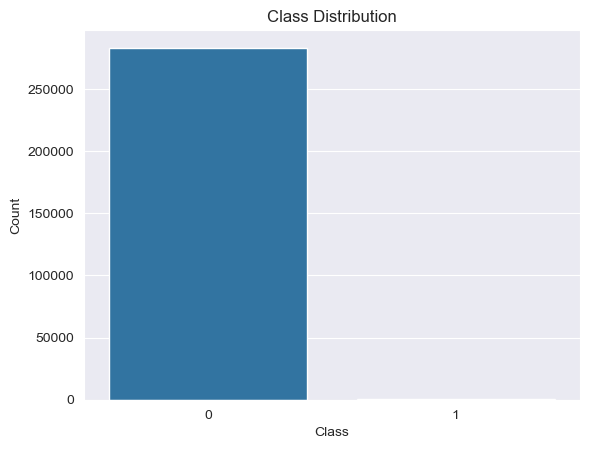

In [134]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

We can see that the dataset is highly imbalanced, with a very small number of fraudulent transactions (Class 1) compared to non-fraudulent transactions (Class 0).

Transaction Amount Distribution

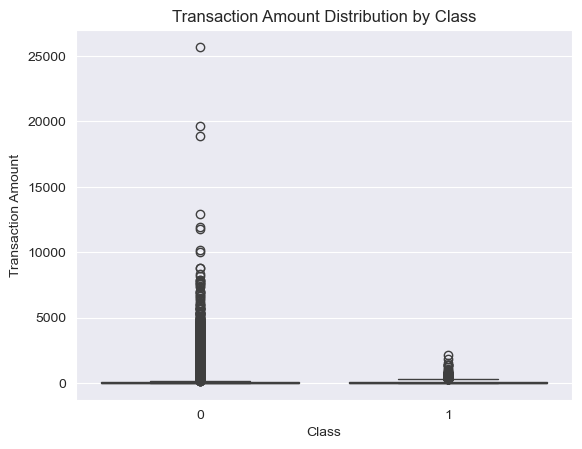

In [135]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

We see that the fraudulent transactions (Class 1) have smaller transaction amounts compared to non-fraudulent transactions (Class 0). Frauds are often small transactions, as they are less likely to be detected

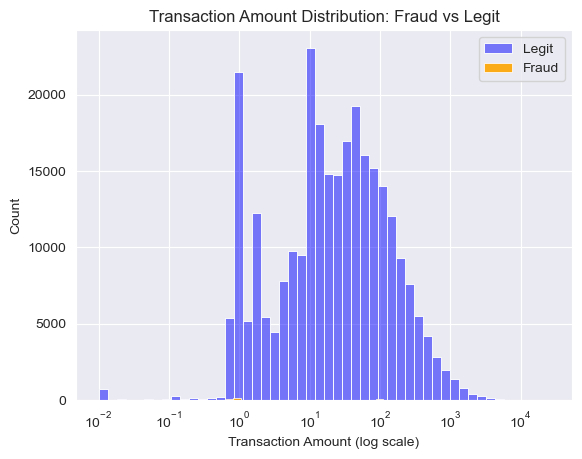

In [136]:
sns.histplot(data[data['Class'] == 0]['Amount'], color="blue", label="Legit", bins=50, log_scale=True, alpha=0.5)
sns.histplot(data[data['Class'] == 1]['Amount'], color="orange", label="Fraud", bins=50, log_scale=True, alpha=0.9)
plt.legend()
plt.title("Transaction Amount Distribution: Fraud vs Legit")
plt.xlabel("Transaction Amount (log scale)")
plt.ylabel("Count")
plt.show()

Frauds are often small transactions. We see that Fraud operations are only around 1$, while Legit operations peak is around 100$.

Hours distribution

In [137]:
hours_legit = data[data['Class'] == 0]['Hour']
hours_fraud = data[data['Class'] == 1]['Hour']

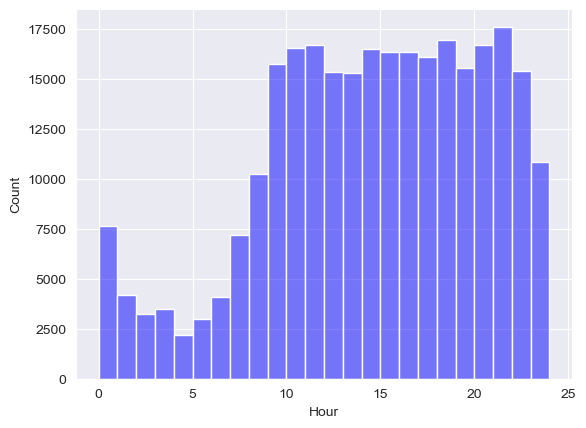

In [138]:
sns.histplot(hours_legit, color="blue", label="Legit", bins=24, alpha=0.5);

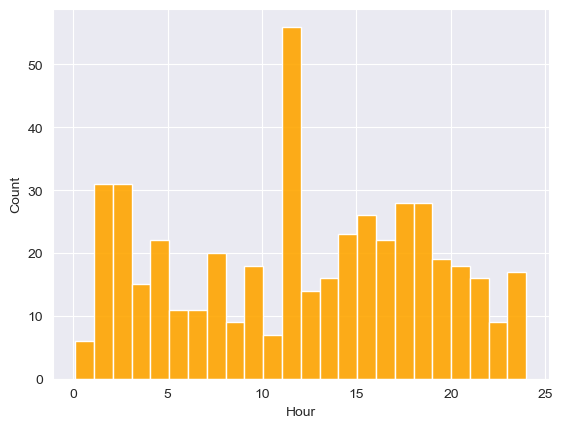

In [139]:
sns.histplot(hours_fraud, color="orange", label="Fraud", bins=24, alpha=0.9);

We see that legit transactions are more frequent during the day, while fraudulent transactions are more frequent at night. This could be due to the fact that fraudsters often operate at night when there is less monitoring. Anyway peak hours for fraud are around 11:00 - 12:00

Correlation Matrix

<Axes: >

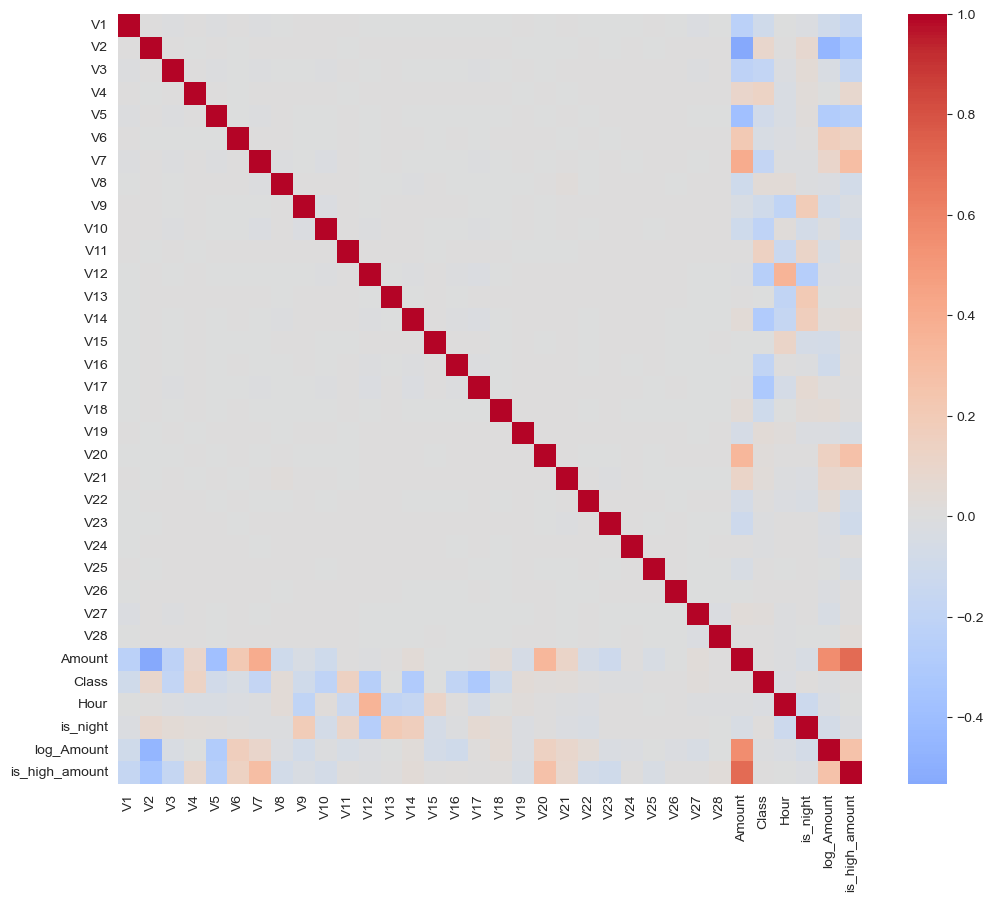

In [140]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', center=0)

Linear correlation is not a good indicator of fraud detection. We can see that there are some features that are highly correlated with each other, but not with the target variable. This is expected, as fraud detection is a complex problem that requires more advanced techniques.

### 4. Model Training and Evaluation